# Cheatsheet (Theorie)
>## <ins>Table of contents</ins> <a name="up"></a>[<sup>[1]</sup>](#cite_note-1)
>* [**1. Allgemein**](#1.)
>* [**K2. Überwachtes Lernen**](#K2)
    * [**2.1. Lineare Regression**](#2.1.)
    * [**2.2. Lineare Regression**](#2.2.)
    * [**2.3. Lineare Regression**](#2.3.)
    * [**2.4. Lineare Regression**](#2.4.)
>* [**K3. Motivation und Grundlagen**](#K3)
>* [**K4. Motivation und Grundlagen**](#K4)
>* [**K5. Motivation und Grundlagen**](#K5)
    * [**5.1. RNN**](#5.1.)
       * [**5.1. RNN**](#5.1.)
    * [**5.3. RNN**](#5.3.)
       * [**spaltenweise Konkatenation zweier Matrizen**](#5.3.1.)
       * [**One-Hot-Codierung**](#5.3.2.)
       * [**Berechnungsgraphen**](#5.3.3.)

>


In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

## 1. Allgemein <a name=1.><a>

### data preparation

In [22]:
# Ihre Daten
data = {
    'height': [153.3, 158.9, 160.8, 179.6, 156.6, 165.1, 165.9, 156.7, 167.8, 160.8],
    'ringlength': [47.1, 46.8, 49.3, 53.2, 47.7, 49.0, 50.6, 47.1, 51.7, 47.8]
}
# Datensatz Erstellen
Dring = pd.DataFrame(data)
X = Dring["height"].to_numpy().reshape(-1, 1)
y = Dring["ringlength"].to_numpy().reshape(-1, 1)

### data visualisieren

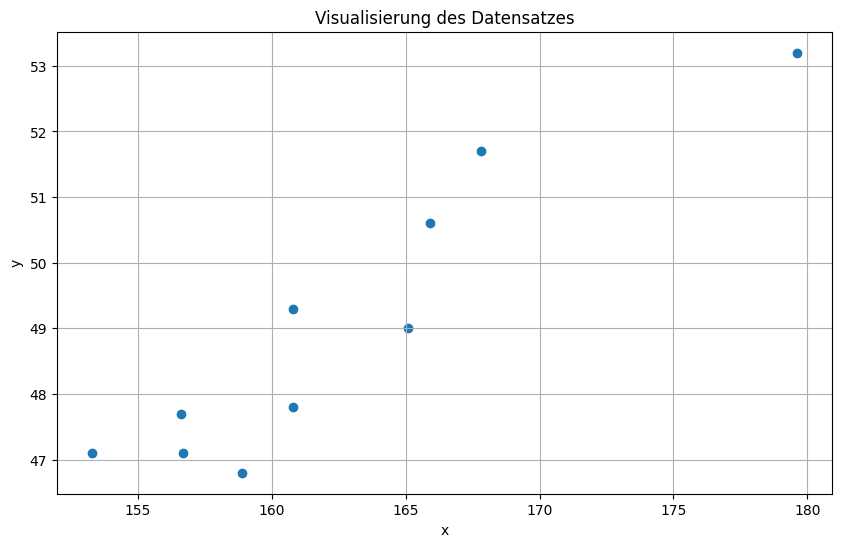

In [23]:
# Datensatz visualisieren
def visualise_datensatz(x,y):
    # Erstellen Sie das Diagramm
    plt.figure(figsize=(10, 6))
    plt.scatter(x,y)
    plt.title('Visualisierung des Datensatzes')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
visualise_datensatz(X,y)

## 2.1. Lineare Regression <a name=2.1.><a>

#### 1. Daten vorbereiten

In [24]:
# Ihre Daten
data = {
    'height': [153.3, 158.9, 160.8, 179.6, 156.6, 165.1, 165.9, 156.7, 167.8, 160.8],
    'ringlength': [47.1, 46.8, 49.3, 53.2, 47.7, 49.0, 50.6, 47.1, 51.7, 47.8]
}
# Datensatz Erstellen
Dring = pd.DataFrame(data)

X = Dring["height"].to_numpy().reshape(-1, 1)
y = Dring["ringlength"].to_numpy().reshape(-1, 1)

In [25]:
def h(theta_0, theta_1,z): #hθ (x) = θ0 +θ1x1
    return theta_0 + theta_1*z

#Funktionen der entsprechenden linearen Modelle aufgespannt auf den raum z
f1 = h(47,0.01,X)
f2 = h(-4,1/3,X)
f3 = h(9,0.25,X)  

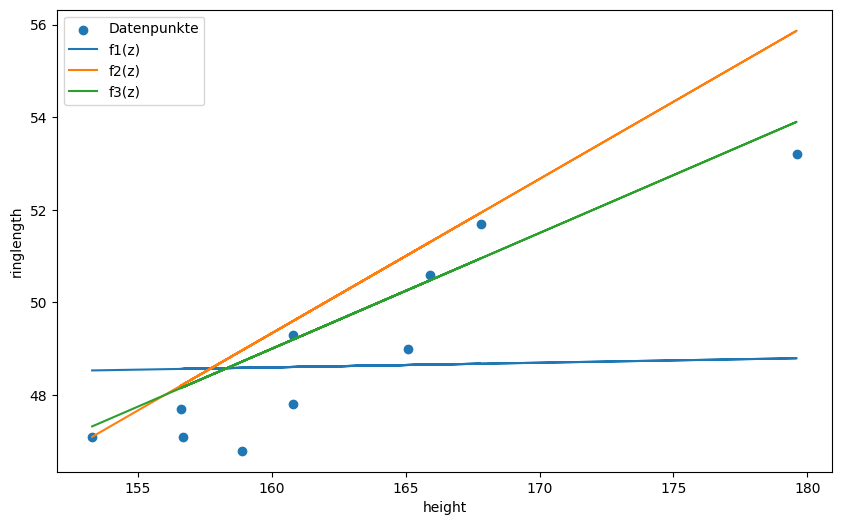

In [27]:
##visualisierung von Funktionen
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Datenpunkte')
plt.plot(X, f1, label = "f1(z)")
plt.plot(X, f2, label = "f2(z)")
plt.plot(X, f3, label = "f3(z)")
plt.xlabel("height")
plt.ylabel("ringlength")
plt.legend()
plt.show()

#### 2. Quadratischer Fehler $L(D,f)$ berechnen

In [28]:
def L_berechnen(f_x, y):
    # Berechnet den quadratischen Fehler (MSE: Mean Squared Error)
    L = np.sum((f_x - y) ** 2)
    print(f"Der quadratische Fehler des Modells ist: {L}")
    return L
    
# Berechnen Sie den quadratischen Fehler für f1 und f2 und f3
L_f1 = L_berechnen(f1, y)
L_f2 = L_berechnen(f2, y)
L_f3 = L_berechnen(f3, y)

Der quadratische Fehler des Modells ist: 41.70476500000007
Der quadratische Fehler des Modells ist: 21.34888888888884
Der quadratische Fehler des Modells ist: 9.77812500000001


#### 3. Das optimale linearer Modell berechnen

In [30]:
regr = LinearRegression().fit(X,y)
ypts_pred = regr.predict(y)
#y_pred = regr.predict(X)

theta_0 = regr.intercept_[0] #konstante θ0 
theta_koef = regr.coef_[0][0] #(θ1*x1 + θ2*x2 + ... + θk*xk)

print(f"Das optimale trainierte Modell ist: h(x) = {theta_0} + {theta_koef}x ")

Das optimale trainierte Modell ist: h(x) = 5.3623451652386365 + 0.2686413708690333x 


In [ ]:
foptimal = h(theta_0,theta_koef, X)
#und dessen quadratischen Fehler L
L_foptimal = L_berechnen(foptimal, y)
L_foptimal

In [ ]:
xpts = np.linspace(X.max(), X.min(), 1000) # oder direkt X verwenden

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(xpts, ypts_pred)
#plt.plot(X, y_pred, color = 'r')
plt.title('Visualisierung des Datensatzes')
plt.xlabel('height')
plt.ylabel('ringlength')
plt.grid(True)
plt.show()

#### 4. Evaluation: Datensatz teilen

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr.fit(X_train,y_train)

#### 5. Bestimmtheitsmaß $R^2$-Wert

$R^2(D_{ring} , f) = $

In [31]:
regr.score(X,y)

0.861787143634611

$R^2(D^{train}_{ring} , f) = $

In [32]:
regr.score(X_train, y_train)

0.8825437992037117

$R^2(D^{test}_{ring} , f) = $

In [33]:
regr.score(X_test, y_test)

-0.5120690675052229

#### 6. Kreuzvalidierung (engl. cross validation)

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=3)
scores

array([0.75468997, 0.74975476, 0.77382931])

In [12]:
scores.mean()

0.7594246779223471

#### 7. Polynomiale Regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("./KE2_ueberwachtes_Lernen/2_1_Lineare_Regression/dataset/sl_linreg_ex_fitting.csv")

X = df["x"].to_numpy().reshape(-1, 1)
y = df["y"].to_numpy().reshape(-1, 1)

df_test = pd.read_csv("./KE2_ueberwachtes_Lernen/2_1_Lineare_Regression/dataset/sl_linreg_ex_fitting_test.csv")

X_test = df_test["x"].to_numpy().reshape(-1, 1)
y_test = df_test["y"].to_numpy().reshape(-1, 1)

poly = PolynomialFeatures(9)
X_ext = poly.fit_transform(X)
X_ext_test = poly.transform(X_test)

poly_regr = LinearRegression().fit(X_ext,y)
poly_regr.score(X_ext,y)

0.9999999999999843

In [ ]:
poly_regr.score(X_ext_test,y_test)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Erstellen Sie eine Reihe von x-Werten für die Plots
x_values = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i in range(1, 10):
    # Erstellen Sie ein PolynomialFeatures-Objekt für den aktuellen Grad
    poly = PolynomialFeatures(i)
    
    # Transformieren Sie die x-Werte
    X_ext = poly.fit_transform(X)
    x_values_ext = poly.transform(x_values)
    
    # Trainieren Sie das Modell
    poly_regr = LinearRegression().fit(X_ext, y)
    
    # Berechnen Sie die y-Werte für das aktuelle Polynom
    y_values = poly_regr.predict(x_values_ext)
    
    # Erstellen Sie einen Plot für das aktuelle Polynom
    ax = axs[(i - 1) // 3, (i - 1) % 3]
    ax.scatter(X, y, color='blue')
    ax.plot(x_values, y_values, color='red')
    ax.set_title(f'Polynomgrad {i}')

plt.tight_layout()
plt.show()

#### 8. Ridge-Regression


In [40]:
from sklearn.linear_model import Ridge

ridge_regr = Ridge(alpha=0.2).fit(X_ext,y)
ridge_regr.score(X_ext,y)

C:\Users\maayo\PycharmProjects\Sem2_ML\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.95096e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.990780744926918

In [41]:
ridge_regr.score(X_ext_test,y_test)

0.8679361093493759

---
## 5.3. RNN <a name=5.1.><a>

### 5.3.1. spaltenweise Konkatenation zweier Matrizen <a name=5.3.1.><a>

Sei $A \in \mathbb{R}^{n \times m}$ und $B \in \mathbb{R}^{n \times m'}$ zwei Matrizen mit gleicher Anzahl an Zeilen, so ist $A \circ B \in \mathbb{R}^{n \times (m + m')}$ die entsprechende Konkatenation:

In [ ]:
# Erstellen Sie die Matrizen A und B mit Dummy-Zahlen
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

B = np.array([[10, 11, 12], 
              [13, 14, 15], 
              [16, 17, 18]])

# Führen Sie die Konkatenation durch
AB = np.concatenate((A, B), axis=1)
print(AB)

# Erstellen Sie die Vektoren v und w mit Dummy-Zahlen
v = np.array([1, 2, 3])  # v = (v1, ..., vm)^T
w = np.array([4, 5, 6])  # w = (w1, ..., wm')^T

# Führen Sie die Konkatenation durch
vw = np.concatenate((v, w))
print("v ◦ w =", vw)

Vergewissern Sie sich, dass für die obigen Definition gilt $(A \circ B)(v \circ w) = Av + Bw$.

In [ ]:
result1 = np.dot(AB,vw)
result2 = np.dot(A,v) + np.dot(B,w)
print(result1 == result2)

### 5.3.2. One-Hot-Codierung <a name=5.3.2.><a>


Sei ein Alphabet gegeben durch

Σ={a,e,s,t}

1. Bestimmen Sie eine One-Hot-Codierung für Σ
. (Anwortformat '(1,2,3,4,5,6)', Vektorlänge ist selbst zu wä
2. Wie ist demnach das Wort test
 codiert 

(Anwortformat '((1,2,3,4,5,6),(7,8,9))')
#### Lösung
- a: (1, 0, 0, 0)
- e: (0, 1, 0, 0)
- s: (0, 0, 1, 0)
- t: (0, 0, 0, 1)

Unter Verwendung der zuvor definierten One-Hot-Codierung für das Alphabet Σ={a,e,s,t}, wird das Wort "test" wie folgt codiert:

- t: (0, 0, 0, 1)
- e: (0, 1, 0, 0)
- s: (0, 0, 1, 0)
- t: (0, 0, 0, 1)

Daher ist die Codierung des Wortes "test" in dem von Ihnen angegebenen Antwortformat:

((0, 0, 0, 1), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1))

### 5.3.3. Berechnungsgraphen <a name=5.3.3.><a>
Im Allgemeinen gilt für eine Eingabe $x = (x^{(1)}, \ldots, x^{(m)})$:

$$
h(i) = \text{act}(Ux^{(i)} + Wh^{(i-1)}) \quad \text{(1)}
$$ <a name=hi><a>

$$
o(i) = \text{act}(Vh^{(i)}) \quad \text{(2)}
$$<a name=oi><a>

für $i = 1, \ldots, m$. Zu beachten ist, dass diese Netzwerkarchitektur mit Eingaben beliebiger Länge umgehen kann, aber eine fixe Anzahl an Parametern besitzt (in den Matrizen $U$, $V$, $W$).

Gegeben sei das abgebildete einfache RNN, wobei

$$\sum = \{\text{ist,nichts,niemand}\} = \{(1,0,0)^T,(0,1,0)^T,(0,0,1)^T\}$$
$$U= ((0, 0.9, 0.9), (0.5, 0.1, 0), (0.5, 0, 0.1))$$
$$W = ((0, 0.45, 0.45), (0.25, 0.05, 0), (0.25, 0, 0.05))$$
$$V = ((0.5, 0, 0), (0, 0.5, 0), (0, 0, 0.5))$$
$$h_0 = (0,1,1)^T$$

und die Aktivierungsfunktion $h^{relu}$ ist. Berechnen Sie die hidden states und die Ausgabe für die Eingabe $x = \text{'Niemand ist'} = ((0,0,1)^T,(1,0,0)^T)$. 
(Antwortformat '(1,2,3.456)')

In [ ]:
import numpy as np

def hrelu(x):
    return np.maximum(0, x)

U = np.array([[0, 0.9, 0.9], [0.5, 0.1, 0], [0.5, 0, 0.1]])
W = np.array([[0, 0.45, 0.45], [0.25, 0.05, 0], [0.25, 0, 0.05]])
V = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.5]])
h_0 = np.array([0,1,1]).T
x = np.array([[0,0,1],[1,0,0]]).T

h_1 = hrelu(np.dot(U, x[:,0]) + np.dot(W, h_0))
h_2 = hrelu(np.dot(U, x[:,1]) + np.dot(W, h_1))

o_1 = hrelu(np.dot(V, h_1))
o_2 = hrelu(np.dot(V, h_2))

print("h_1: ", h_1)
print("h_2: ", h_2)
print("o_1: ", o_1)
print("o_2: ", o_2)


### 5.3.4. Long short-term memory-Netzwerke <a name=5.3.4.><a>


$$f^{(i)} = h^{logit} (U^f x^{(i)} + W^f h^{(i−1)})$$
- Der Vektor $f^{(i)}$ soll steuern, was aus dem Langzeitgedächtnis `s` vergessen werden soll (auch als **forget gate** bezeichnet).

$$g^{(i)} = h^{logit} (U^g x^{(i)} + W^g h^{(i−1)})$$
$$k^{(i)} = h^{tanh} (U^k x^{(i)} + W^k h^{(i−1)})$$
- Der Vektor $g^{(i)}$ (**input gate**) steuert, welche Informationen aus $k^{(i)}$ in das Langzeitgedächtnis aufgenommen werden sollen.
$$q^{(i)} = h^{logit} (U^o x^{(i)} + W^o h^{(i−1)})$$
- Der Vektor $q^{(i)}$ (**output gate**) steuert, welche Information in die Ausgabe und den nächsten versteckten Zustand $h^{(i)}$ einfließt.

- Die Kernidee hinter LSTMs liegt in der Definition des Zellzustands: $$s^{(i)} = f^{(i)} \cdot s^{(i-1)} + g^{(i)} \cdot k^{(i)}$$